
![alt text](https://img-blog.csdn.net/20161213211547907?watermark/2/text/aHR0cDovL2Jsb2cuY3Nkbi5uZXQvcXRseXg=/font/5a6L5L2T/fontsize/400/fill/I0JBQkFCMA==/dissolve/70/gravity/Center "Logo Title Text 1")

了解一点金融工程的对这个公式都不会太陌生，是用现在股价预测T时间股价的公式，其背后是股价符合几何布朗运动，也就是大名鼎鼎的BSM期权定价模型的基础

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
S0 = 100
r = 0.05
sigma = 0.25
T = 2.0
I = 10000
ST1 = S0*np.exp((r - 0.5*sigma**2)*T+sigma*np.sqrt(T)*np.random.standard_normal(I))
plt.hist(ST1,bins = 50)
plt.xlabel('price')
plt.ylabel('ferquency')
plt.show();

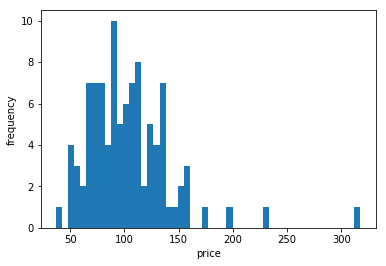

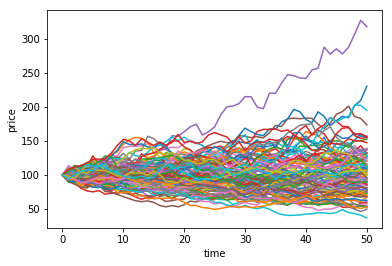

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as scs
S0 = 100
r = 0.05
sigma = 0.25
T = 2.0
I = 100
#ST1 = S0*np.exp((r - 0.5*sigma**2)*T+sigma*np.sqrt(T)*np.random.standard_normal(I))
#plt.hist(ST1,bins = 50)
#plt.xlabel('price')
#plt.ylabel('ferquency')
 
M = 50
dt = T/M
S = np.zeros((M + 1,I))
S[0] = S0
# print( S[0])
for t in range(1,M+1):
    S[t] = S[t-1]*np.exp((r-0.5*sigma**2)*dt+sigma*np.sqrt(dt)*np.random.standard_normal(I))
plt.hist(S[-1],bins = 50)
plt.xlabel('price')
plt.ylabel('frequency')
plt.show()
plt.plot(S[:,:],lw = 1.5)
plt.xlabel('time')
plt.ylabel('price')
plt.show();

##Germen Tank Problem

###频率学派

=m+(m−k)/k

频率学派将模型参数看着是固定的，直观理解如上，群体最大值的估计值等于样本最大值加上样本观测值之间的平均距离。


###贝叶斯学派

贝叶斯学派则把参数也看着是随机变量

![alt text](http://image.sciencenet.cn/home/201803/13/071314v85fpp2ph87hp6d6.jpg "Logo Title Text 1")


In [11]:
import numpy as np
import pymc3 as pm
observed = np.array([7,275,182,86])
m = max(observed)

with pm.Model() as model:
    N = pm.Uniform('N',m,1000)
    L = pm.Uniform('Likelihood', 0, N, observed=observed)

In [26]:
with model:
    step = pm.Metropolis()
    start ={'N' : m}
    samples = pm.sample(1000, step,start)

Multiprocess sampling (4 chains in 4 jobs)


Metropolis: [N]


Sampling 4 chains:   0%|          | 0/6000 [00:00<?, ?draws/s]

Sampling 4 chains:  11%|█         | 635/6000 [00:00<00:00, 6342.13draws/s]

Sampling 4 chains:  19%|█▉        | 1151/6000 [00:00<00:00, 5932.94draws/s]

Sampling 4 chains:  28%|██▊       | 1686/6000 [00:00<00:00, 5743.74draws/s]

Sampling 4 chains:  37%|███▋      | 2197/6000 [00:00<00:00, 5536.37draws/s]

Sampling 4 chains:  48%|████▊     | 2860/6000 [00:00<00:00, 5824.58draws/s]

Sampling 4 chains:  58%|█████▊    | 3498/6000 [00:00<00:00, 5978.51draws/s]

Sampling 4 chains:  68%|██████▊   | 4069/6000 [00:00<00:00, 5894.68draws/s]

Sampling 4 chains:  78%|███████▊  | 4709/6000 [00:00<00:00, 6036.91draws/s]

Sampling 4 chains:  89%|████████▉ | 5340/6000 [00:00<00:00, 6113.30draws/s]

Sampling 4 chains:  99%|█████████▉| 5929/6000 [00:01<00:00, 5798.96draws/s]

Sampling 4 chains: 100%|██████████| 6000/6000 [00:01<00:00, 5789.32draws/s]

The number of effective samples is smaller than 25% for some parameters.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c269dfe80>,
      dtype=object)

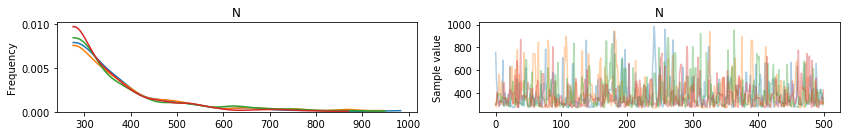

In [30]:
%matplotlib inline
pm.traceplot(samples[-2000::2])

In [31]:
np.median(samples[-2000::2]['N'])

344.2241417047767